<br> 

#### 1. Build & train a model

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

In [3]:
(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

# print(train_data.shape) # # of training data == 60000, each data = 28px * 28px
# print(test_data.shape) # # of test data == 10000

train_data = train_data.reshape(60000, 784) / 255.0 # 0~255 -> 0~1
test_data = test_data.reshape(10000, 784) / 255.0 # 0~255 -> 0~1

train_label = utils.to_categorical(train_label) # 0~9 -> one-hot vector
test_label = utils.to_categorical(test_label) # 0~9 -> one-hot vector

In [4]:
model = models.Sequential() 

model.add(layers.Dense(input_dim=28*28, units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) # layers.ELU or layers.LeakyReLU
model.add(layers.Dropout(rate=0.2))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) # layers.ELU or layers.LeakyReLU
model.add(layers.Dropout(rate=0.2))

model.add(layers.Dense(units=10, activation='softmax')) # 0~9 

In [5]:
model.compile(optimizer=optimizers.Adam(), 
              loss=losses.categorical_crossentropy, 
              metrics=[metrics.categorical_accuracy]) # Precision / Recall / F1-Score 적용하기 @ https://j.mp/3cf3lbi

In [6]:
history = model.fit(train_data, train_label, batch_size=100, epochs=15, validation_split=0.2) 

Epoch 1/15
480/480 [==============================] - 3s 5ms/step - loss: 0.3050 - categorical_accuracy: 0.9075 - val_loss: 0.1307 - val_categorical_accuracy: 0.9607
Epoch 2/15
480/480 [==============================] - 2s 5ms/step - loss: 0.1413 - categorical_accuracy: 0.9564 - val_loss: 0.0985 - val_categorical_accuracy: 0.9698
Epoch 3/15
480/480 [==============================] - 2s 5ms/step - loss: 0.1035 - categorical_accuracy: 0.9679 - val_loss: 0.0840 - val_categorical_accuracy: 0.9749
Epoch 4/15
480/480 [==============================] - 2s 5ms/step - loss: 0.0852 - categorical_accuracy: 0.9725 - val_loss: 0.0802 - val_categorical_accuracy: 0.9759
Epoch 5/15
480/480 [==============================] - 2s 5ms/step - loss: 0.0681 - categorical_accuracy: 0.9791 - val_loss: 0.0823 - val_categorical_accuracy: 0.9745
Epoch 6/15
480/480 [==============================] - 2s 5ms/step - loss: 0.0587 - categorical_accuracy: 0.9812 - val_loss: 0.0771 - val_categorical_accuracy: 0.9762
Epoc

In [7]:
result = model.evaluate(test_data, test_label, batch_size=100)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

100/100 [==============================] - 0s 2ms/step - loss: 0.0698 - categorical_accuracy: 0.9813
loss (cross-entropy) : 0.06981161236763
test accuracy : 0.9812999963760376


<br> 

#### 2. Save the trained model

In [8]:
# 저장되는 항목 
# - Model의 architecture
# - Model의 모든 weights (Parameter Theta)
# - The state of the optimizer (바로 모델 학습의 재개 가능)

model.save('mnist_2layer_bn.h5') # "Save" the model

# model.save_weights('mnist_2layer_bn.h5') # weights만 따로 저장도 가능함

<br> 

#### 3. Load the saved model 

In [9]:
from tensorflow.keras import models
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image # pillow
import cv2 # opencv-python

In [10]:
model = models.load_model('mnist_2layer_bn.h5') # "Load" the model

# model.load_weights('trained_model.h5') # weights만 따로 불러올 수 있음

In [11]:
result = model.evaluate(test_data, test_label)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

313/313 [==============================] - 1s 1ms/step - loss: 0.0698 - categorical_accuracy: 0.9813
loss (cross-entropy) : 0.06981159001588821
test accuracy : 0.9812999963760376


In [12]:
sample_one = test_data[0]
print(sample_one.shape)

sample_one = np.reshape(test_data[0], (1, 28*28))
print(sample_one.shape)

(784,)
(1, 784)


In [13]:
model.predict(sample_one)

array([[1.3644857e-09, 9.6214869e-11, 3.1766557e-08, 1.0475949e-06,
        3.1736710e-11, 6.6590350e-10, 1.9885977e-12, 9.9999881e-01,
        4.2537401e-11, 1.3202670e-07]], dtype=float32)

In [14]:
np.argmax(model.predict(sample_one))

7

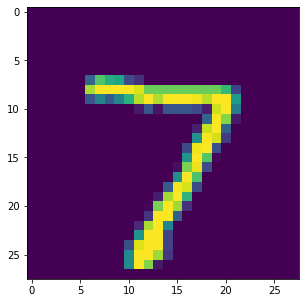

In [15]:
img = np.reshape(test_data[0], (28, 28))

plt.figure(figsize=(5, 5)) 
plt.imshow(img)
plt.show()

<br> 

#### 4. Predict on a sample image

(28, 28)


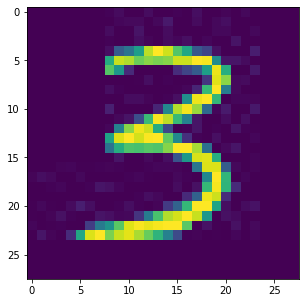

In [16]:
sample_array = np.array(Image.open("sample_num3.jpg"))
print(sample_array.shape)

plt.figure(figsize=(5, 5)) 
plt.imshow(sample_array)
plt.show()

In [17]:
sample_one = sample_array
print(sample_one.shape)

sample_one = np.reshape(sample_array, (1, 28*28))
print(sample_one.shape)

(28, 28)
(1, 784)


In [18]:
model.predict(sample_one)

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [19]:
np.argmax(model.predict(sample_one))

3

<br> 

#### 5. Predict on a sample image - 500 x 500 x 3 (big & 3-channel)

(500, 500, 3)


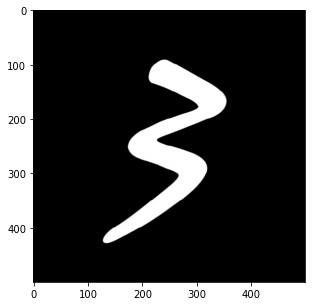

In [20]:
sample_array = np.array(Image.open("sample_num3_500.jpg"))
print(sample_array.shape)

plt.figure(figsize=(5, 5)) 
plt.imshow(sample_array)
plt.show()

In [21]:
image_big_path = "sample_num3_500.jpg"
img = cv2.imread(image_big_path, 1)
print(img.shape)

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)

img = cv2.resize(img, (28, 28))
print(img.shape)

sample_one = np.reshape(img, (1, 28*28))
print(sample_one.shape)

(500, 500, 3)
(500, 500)
(28, 28)
(1, 784)


In [22]:
model.predict(sample_one)

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [23]:
np.argmax(model.predict(sample_one))

3